In [53]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Nota

Note que odeint aplica LSOAD para cada uno de los elementos del array state.

Sobre el array state, este es de la forma

$\vec{S} = [r_1, v_1, r_2, v_2, r_3, v_3]$


LSOAD usa RK el cual requiere una funcion tal que

$f(y,t) = \frac{dy}{dt}$

La función `three_body_eq` retorna un vector de la forma

$\vec{S}' = [v_1, a_1,v_2,a_2,v_3,a_3]$

Tal que esta función cumple todos los requisitos para implementarse sobre un integrador basado en RK.

In [54]:
G = 6.67430e-11

def three_body_eq(state, t, m1, m2, m3):
    """
    Calculate the time derivative for every member of the sate vector for the three-body problem

    state: 18 elements array with the following structure (Those are instantaneous
    values of the position and velocity of each of the three bodies),
       [x1, y1, z1, vx1, vy1, vz1,
        x2, y2, z2, vx2, vy2, vz2,
        x3, y3, z3, vx3, vy3, vz3]
    t: time (required by odeint method)
    m1, m2, m3: masses of the three bodies
    """
    x1, y1, z1, vx1, vy1, vz1, \
    x2, y2, z2, vx2, vy2, vz2, \
    x3, y3, z3, vx3, vy3, vz3 = state

    r1 = np.array([x1, y1, z1])
    r2 = np.array([x2, y2, z2])
    r3 = np.array([x3, y3, z3])
    
    r12 = r2 - r1
    r13 = r3 - r1
    r23 = r3 - r2

    d12 = np.linalg.norm(r12)
    d13 = np.linalg.norm(r13)
    d23 = np.linalg.norm(r23)
    eps = 1e-10
    d12 = max(d12, eps)
    d13 = max(d13, eps)
    d23 = max(d23, eps)
    
    a1 = G * m2 * r12 / d12**3 + G * m3 * r13 / d13**3
    a2 = G * m1 * (-r12) / d12**3 + G * m3 * r23 / d23**3
    a3 = G * m1 * (-r13) / d13**3 + G * m2 * (-r23) / d23**3
    
    return [vx1, vy1, vz1, a1[0], a1[1], a1[2],
            vx2, vy2, vz2, a2[0], a2[1], a2[2],
            vx3, vy3, vz3, a3[0], a3[1], a3[2]]

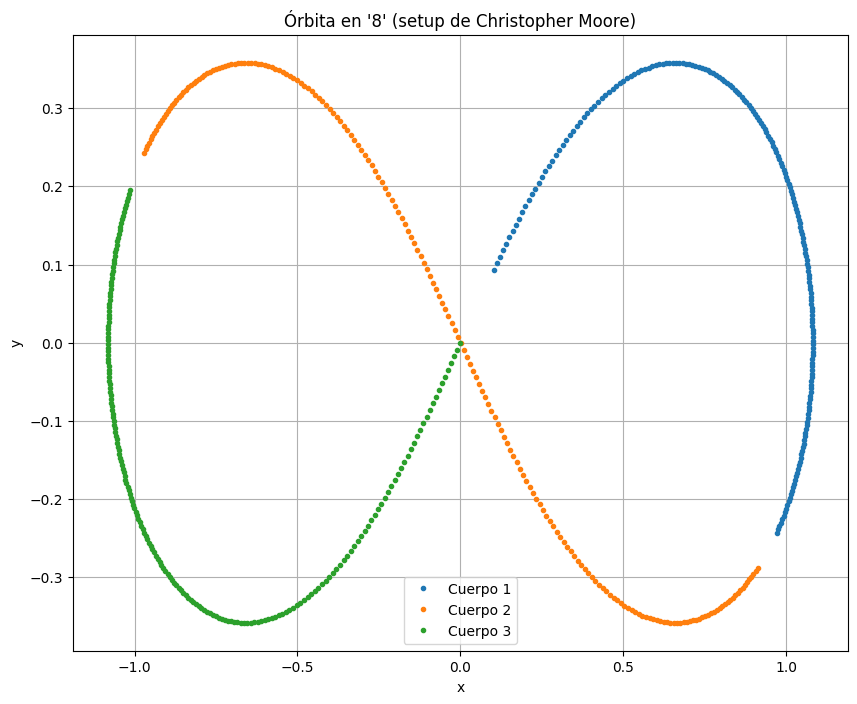

In [55]:
# ----------------------
# System parameters
# ----------------------

G = 1.0 # Gravitational constant normalized
m1 = m2 = m3 = 1.0

# ----------------------------
# Initial conditions
# ----------------------------

r1 = np.array([0.97000436, -0.24308753, 0.0])
r2 = np.array([-0.97000436, 0.24308753, 0.0])
r3 = np.array([0.0, 0.0, 0.0])

v1 = np.array([0.4662036850, 0.43236573, 0.0])
v2 = np.array([0.4662036850, 0.43236573, 0.0])
v3 = np.array([-0.93240737, -0.86473146, 0.0])

state0 = np.concatenate((r1, v1, r2, v2, r3, v3))

t_max = 2
num_points = 200
t = np.linspace(0, t_max, num_points)

# ----------------------------
# Solve the system
# ----------------------------
sol = odeint(three_body_eq, state0, t, args=(m1, m2, m3))



x1, y1 = sol[:, 0], sol[:, 1]
x2, y2 = sol[:, 6], sol[:, 7]
x3, y3 = sol[:, 12], sol[:, 13]

plt.figure(figsize=(10,8))
plt.plot(x1, y1,'.', label='Cuerpo 1')
plt.plot(x2, y2,'.', label='Cuerpo 2')
plt.plot(x3, y3, '.',label='Cuerpo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Órbita en '8' (setup de Christopher Moore)")
plt.legend()
plt.grid(True)
plt.show()

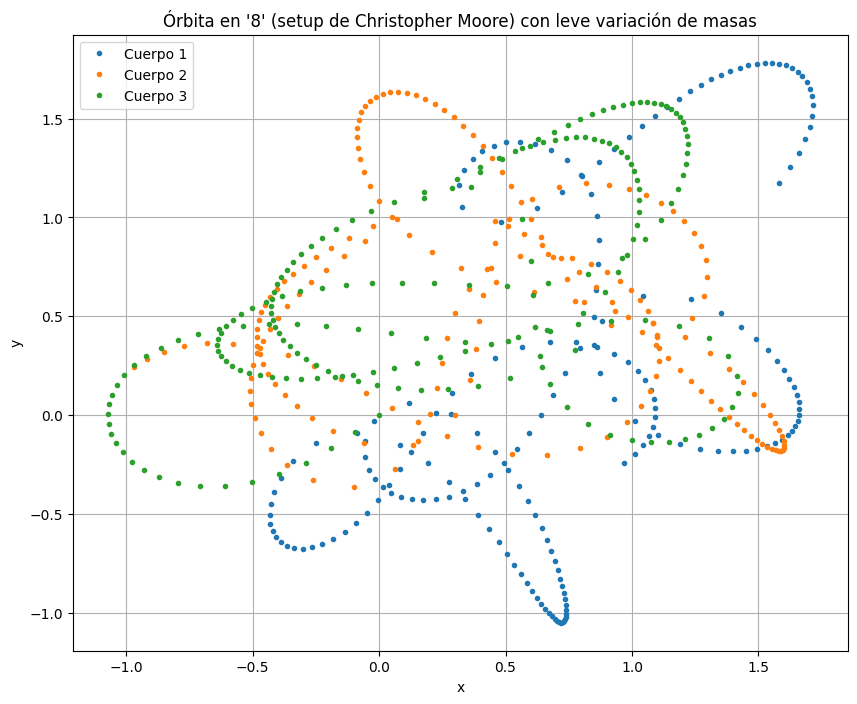

In [56]:
# ----------------------
# System parameters
# ----------------------

G = 1.0 # Gravitational constant normalized
m1 = 1.1
m2 = 1
m3 = 0.9

# ----------------------------
# Initial conditions
# ----------------------------

r1 = np.array([0.97000436, -0.24308753, 0.0])
r2 = np.array([-0.97000436, 0.24308753, 0.0])
r3 = np.array([0.0, 0.0, 0.0])

v1 = np.array([0.4662036850, 0.43236573, 0.0])
v2 = np.array([0.4662036850, 0.43236573, 0.0])
v3 = np.array([-0.93240737, -0.86473146, 0.0])

state0 = np.concatenate((r1, v1, r2, v2, r3, v3))

t_max = 20
num_points = 200
t = np.linspace(0, t_max, num_points)

# ----------------------------
# Solve the system
# ----------------------------
sol = odeint(three_body_eq, state0, t, args=(m1, m2, m3))

x1, y1 = sol[:, 0], sol[:, 1]
x2, y2 = sol[:, 6], sol[:, 7]
x3, y3 = sol[:, 12], sol[:, 13]

plt.figure(figsize=(10,8))
plt.plot(x1, y1,'.', label='Cuerpo 1')
plt.plot(x2, y2,'.', label='Cuerpo 2')
plt.plot(x3, y3, '.',label='Cuerpo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Órbita en '8' (setup de Christopher Moore) con leve variación de masas")
plt.legend()
plt.grid(True)
plt.show()